# Classifying Asteroids as Hazardous

In [43]:
# Imports
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

## Data Preprocess

### Exploratory Data Analysis

In [44]:
df = pd.read_csv('data/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Looking at the data, we can find columns that are note needed since they are duplicated in different units of measure.
We can also remove identification columns since they don't provide useful information to the problem.

In [46]:
cols_to_drop = [
    # Remove duplicated columns (same data, different units of measure)
    "Est Dia in KM(min)",
    "Est Dia in KM(max)",
    "Est Dia in Miles(min)",
    "Est Dia in Miles(max)",
    "Est Dia in Feet(min)",
    "Est Dia in Feet(max)",
    "Relative Velocity km per hr",
    "Miles per hour",
    "Miss Dist.(Astronomical)",
    "Miss Dist.(lunar)",
    "Miss Dist.(miles)",

    # Remove identification columns
    "Neo Reference ID",
    "Name",
    "Orbit ID",
    'Close Approach Date',
    'Orbit Determination Date',
]

df.drop(cols_to_drop, axis=1, inplace=True)

In [47]:
# Check for missing values
df.isna().sum()

Absolute Magnitude              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Miss Dist.(kilometers)          0
Orbiting Body                   0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
Equinox                         0
Hazardous                       0
dtype: int64

In [48]:
# Check for duplicated values
df.duplicated().sum()

0

In [49]:
# Encode target variable
label_encoder = LabelEncoder()
df["Hazardous"] = label_encoder.fit_transform(df["Hazardous"])

df.head()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbiting Body,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,127.219879,284.472297,788947200000,6.115834,62753692.0,Earth,5,0.025282,4.634,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,21.3,146.067964,326.617897,788947200000,18.113985,57298148.0,Earth,3,0.186935,5.457,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,20.3,231.502122,517.654482,789552000000,7.590711,7622911.5,Earth,0,0.043058,4.557,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,27.4,8.801465,19.680675,790156800000,11.173874,42683616.0,Earth,6,0.005512,5.093,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,21.6,127.219879,284.472297,790156800000,9.840831,61010824.0,Earth,1,0.034798,5.154,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


In [50]:
# Remove categorical data that is not relevant to the problem (has a single value)
categorical = df.select_dtypes(include="object").columns.tolist()

unique_categorical = [cat for cat in categorical if df[cat].nunique() == 1]
unique_categorical

['Orbiting Body', 'Equinox']

In [51]:
df.drop(columns=['Orbiting Body', 'Equinox'], axis=1, inplace=True)

Having done the preprocessing, we can now proceed to analyze the data.

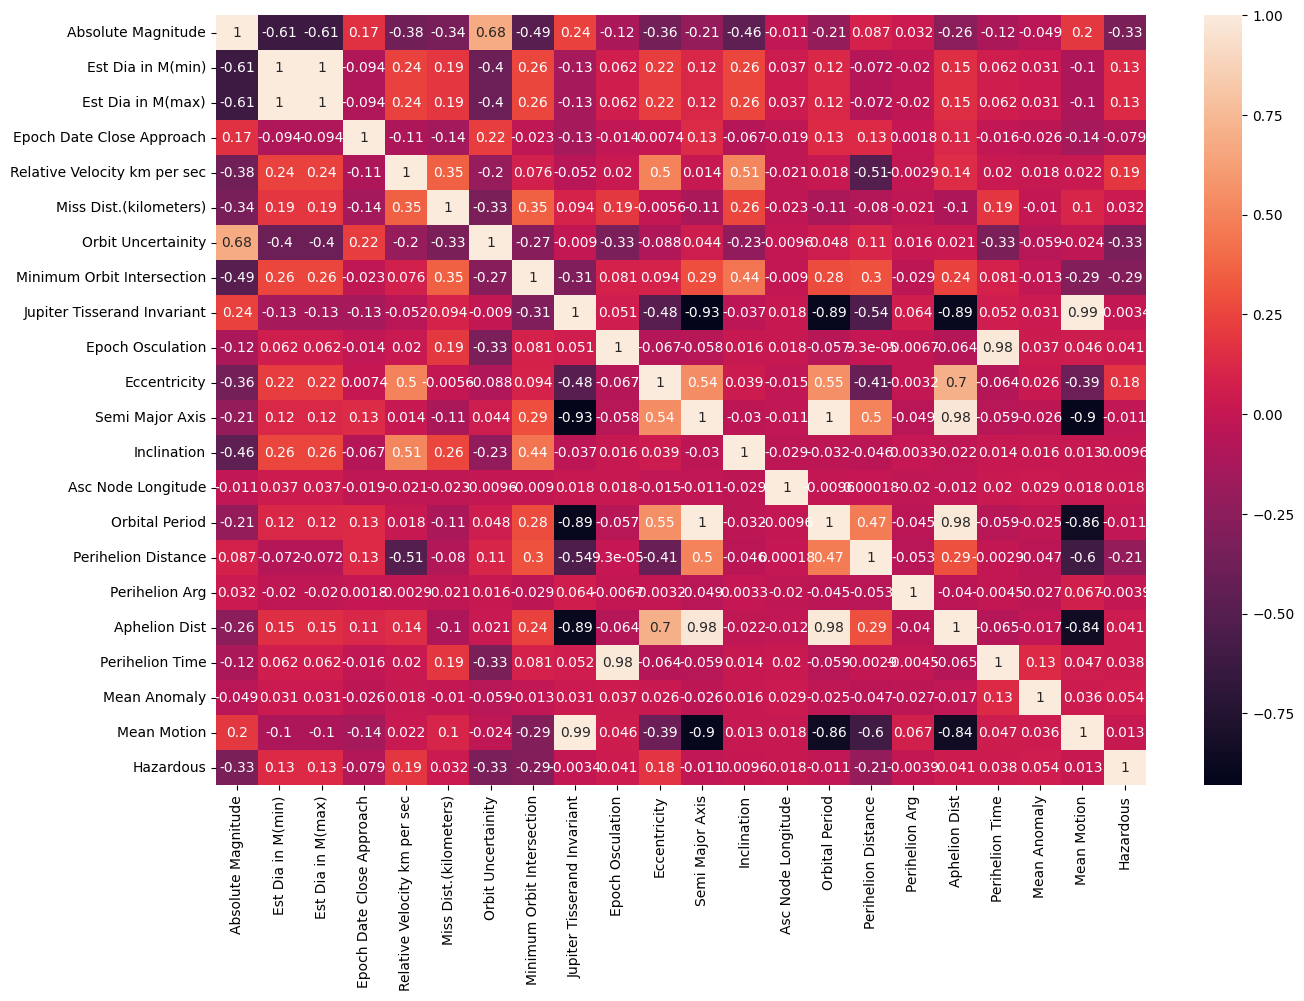

In [52]:
# Correlation matrix

correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True)
plt.show()

With the heatmap in mind we can see that:

    - The columns `Est Dia in M(min)` and `Est Dia in M(max)` are highly correlated.
    - The columns `Jupiter Tisserand Invariant` and `Mean Motion` are highly correlated.
    - The Columns `Epoch Osculation` and `Perihelion Time` are highly correlated.
    - The columns `Semi Major Axis` and `Orbital Period` are highly correlated.
    - The columns `Semi Major Axis` and `Aphelion Dist` are highly correlated.

In [53]:
# remove highly correlated columns
cols_to_remove = [
    'Est Dia in M(min)',
    'Jupiter Tisserand Invariant',
    'Epoch Osculation',
    'Orbital Period',
    'Aphelion Dist',
]

df.drop(cols_to_remove, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in M(max)             4687 non-null   float64
 2   Epoch Date Close Approach     4687 non-null   int64  
 3   Relative Velocity km per sec  4687 non-null   float64
 4   Miss Dist.(kilometers)        4687 non-null   float64
 5   Orbit Uncertainity            4687 non-null   int64  
 6   Minimum Orbit Intersection    4687 non-null   float64
 7   Eccentricity                  4687 non-null   float64
 8   Semi Major Axis               4687 non-null   float64
 9   Inclination                   4687 non-null   float64
 10  Asc Node Longitude            4687 non-null   float64
 11  Perihelion Distance           4687 non-null   float64
 12  Perihelion Arg                4687 non-null   float64
 13  Per

In [54]:
# Select numerical columns
numerical = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical.remove('Hazardous')

numerical

['Absolute Magnitude',
 'Est Dia in M(max)',
 'Epoch Date Close Approach',
 'Relative Velocity km per sec',
 'Miss Dist.(kilometers)',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Eccentricity',
 'Semi Major Axis',
 'Inclination',
 'Asc Node Longitude',
 'Perihelion Distance',
 'Perihelion Arg',
 'Perihelion Time',
 'Mean Anomaly',
 'Mean Motion']

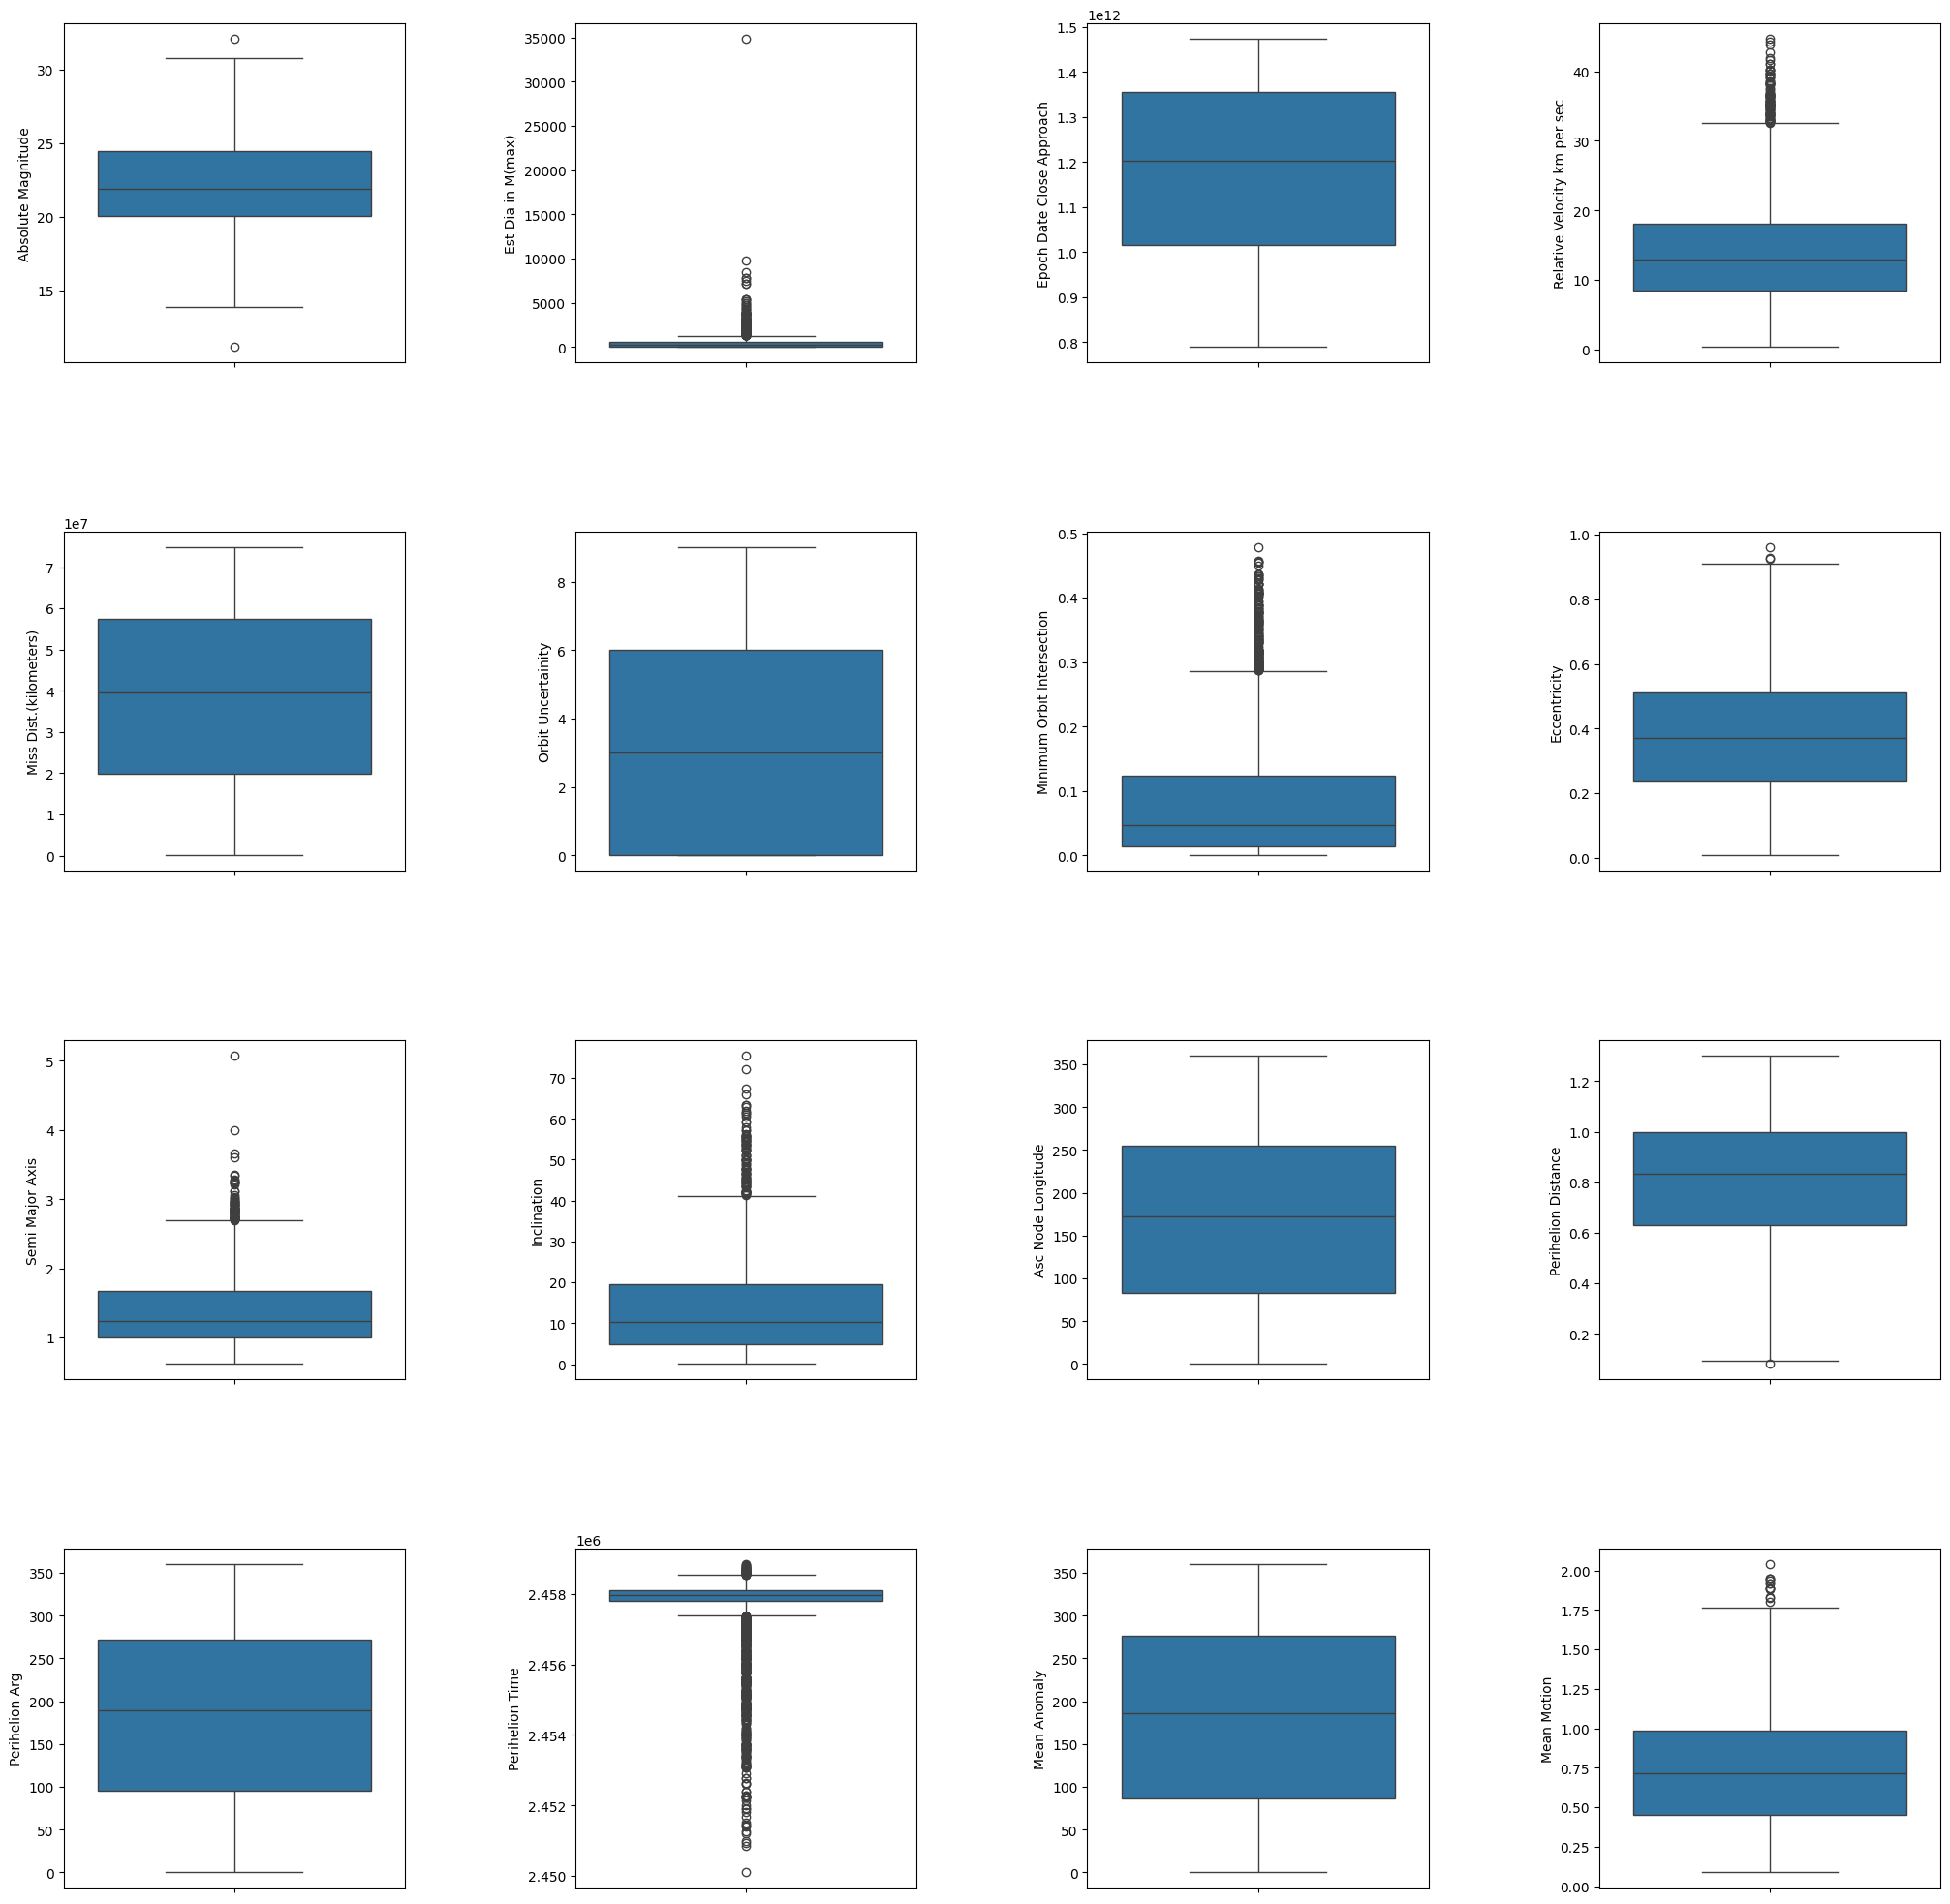

In [55]:
# Plot boxplots for numerical columns

fig, axes = plt.subplots(math.ceil(len(numerical) / 4), 4, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

# for i, col in enumerate(numerical):
#     sb.boxplot(x='Hazardous', y=col, data=df, ax=axes[i])

for col, axis in zip(numerical, axes):
    sb.boxplot(data=df[col], ax=axis)

for i in range(len(numerical), len(axes)):
    fig.delaxes(axes[i])

plt.show()

In [56]:
# Remove outliers

for col in numerical:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.describe()

,Absolute Magnitude,Est Dia in M(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,3379.000000,3379.000000,3.379000e+03,3379.000000,3.379000e+03,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3.379000e+03,3379.000000,3379.000000,3379.000000
mean,22.765146,300.454986,1.174198e+12,12.881393,3.821194e+07,3.446582,0.062982,0.347699,1.275412,11.324620,171.548914,0.799596,184.230096,2.457992e+06,183.036752,0.802622,0.165730
std,2.637856,295.826761,2.010392e+11,6.112745,2.112943e+07,2.806526,0.066252,0.164881,0.411025,8.391165,103.218615,0.219309,103.793662,1.813135e+02,103.730391,0.318142,0.371893
min,18.300000,4.508582,7.889472e+11,0.335504,3.405277e+04,0.000000,0.000002,0.007522,0.678177,0.014513,0.001941,0.155936,0.006918,2.457430e+06,0.003191,0.249449,0.000000
25%,20.700000,65.168838,1.003129e+12,8.063893,2.100113e+07,1.000000,0.011803,0.221680,0.969406,4.551021,82.626102,0.634475,96.256273,2.457880e+06,93.638653,0.541992,0.000000
50%,22.400000,196.806745,1.194509e+12,12.212602,3.864500e+07,4.000000,0.036374,0.334620,1.156999,9.226926,171.316214,0.815542,192.756600,2.457999e+06,187.560356,0.791962,0.000000
75%,24.800000,430.566244,1.353571e+12,16.772189,5.645982e+07,6.000000,0.096850,0.466163,1.489844,16.718088,255.233025,0.975791,271.614674,2.458112e+06,275.087467,1.032631,0.000000
max,30.600000,1300.289270,1.473318e+12,31.128556,7.474496e+07,9.000000,0.267689,0.870305,2.499279,36.809768,359.905890,1.270380,359.993098,2.458499e+06,359.841130,1.764777,1.000000


In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


new_data = df.drop('Hazardous', axis=1)
hazard = df['Hazardous']

(training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(new_data, hazard, test_size=0.25, random_state=1)

def data_results(testing_classes, testing_inputs, alg_class):
    print(confusion_matrix(testing_classes, alg_class.predict(testing_inputs)))

    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(testing_classes, alg_class.predict(testing_inputs)))
    cm_display.plot()
    plt.xticks([0, 1], ["False", "True"])
    plt.yticks([0, 1], ["False", "True"])
    plt.xlabel('Predicted Hazard')
    plt.ylabel('Actual Hazard')
    plt.show()

    print(classification_report(testing_classes, alg_class.predict(testing_inputs)))


[[715   5]
 [  3 122]]


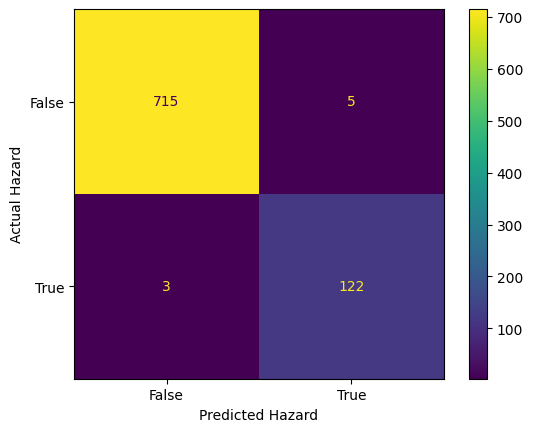

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       720
           1       0.96      0.98      0.97       125

    accuracy                           0.99       845
   macro avg       0.98      0.98      0.98       845
weighted avg       0.99      0.99      0.99       845



In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train_decision_trees():
    dt_class = DecisionTreeClassifier(random_state=1)
    dt_class.fit(training_inputs, training_classes)

    dt_class.score(testing_inputs, testing_classes)

    accuracy_score(testing_classes, dt_class.predict(testing_inputs))

    data_results(testing_classes, testing_inputs, dt_class)

train_decision_trees()

[[688  32]
 [118   7]]


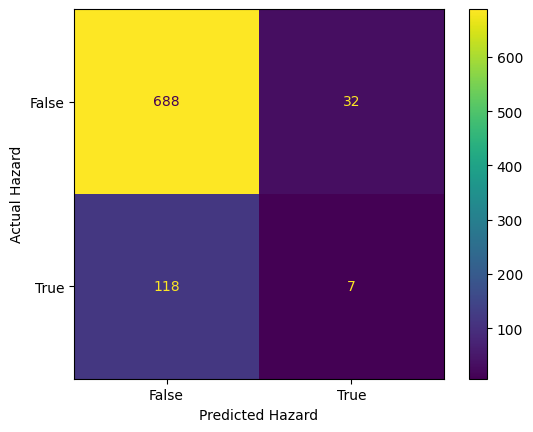

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       720
           1       0.18      0.06      0.09       125

    accuracy                           0.82       845
   macro avg       0.52      0.51      0.49       845
weighted avg       0.75      0.82      0.78       845



In [64]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score


def train_knn(n=5):
    knn_class = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn_class.fit(training_inputs, training_classes)

    knn_class.score(testing_inputs, testing_classes)

    accuracy_score(testing_classes, knn_class.predict(testing_inputs))

    data_results(testing_classes, testing_inputs, knn_class)

train_knn()


[[720   0]
 [125   0]]


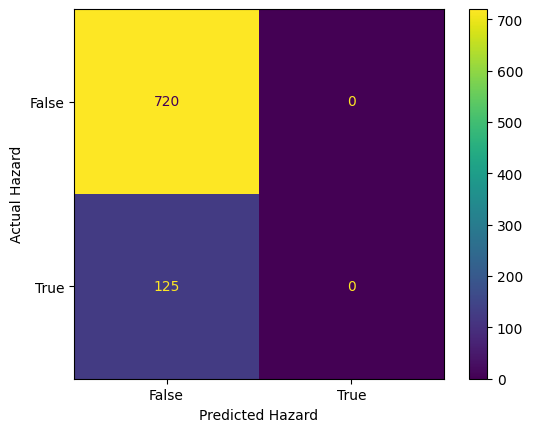

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       720
           1       0.00      0.00      0.00       125

    accuracy                           0.85       845
   macro avg       0.43      0.50      0.46       845
weighted avg       0.73      0.85      0.78       845



c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def train_svm(k='rbf'):
    svm_class = SVC(kernel=k)
    svm_class.fit(training_inputs, training_classes)

    svm_class.score(testing_inputs, testing_classes)

    accuracy_score(testing_classes, svm_class.predict(testing_inputs))

    data_results(testing_classes, testing_inputs, svm_class)

train_svm()


[[720   0]
 [125   0]]


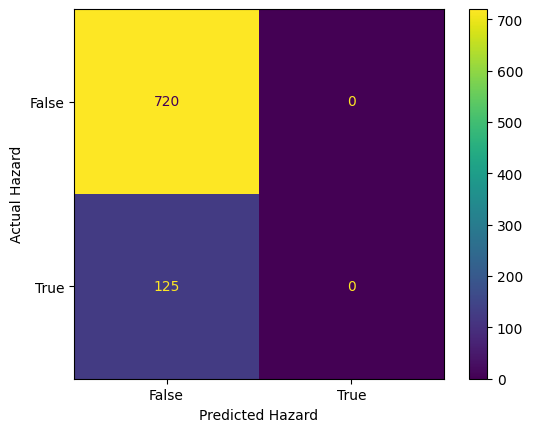

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       720
           1       0.00      0.00      0.00       125

    accuracy                           0.85       845
   macro avg       0.43      0.50      0.46       845
weighted avg       0.73      0.85      0.78       845



c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


def train_ann(layer_n=25, act='logistic', slv='adam'):
    ann_class = MLPClassifier(hidden_layer_sizes=(layer_n*4, layer_n*2, layer_n), activation=act, solver=slv,
                              max_iter=1000, random_state=1)
    ann_class.fit(training_inputs, training_classes)

    ann_class.score(testing_inputs, testing_classes)

    accuracy_score(testing_classes, ann_class.predict(testing_inputs))

    data_results(testing_classes, testing_inputs, ann_class)

train_ann()

[[720   0]
 [125   0]]


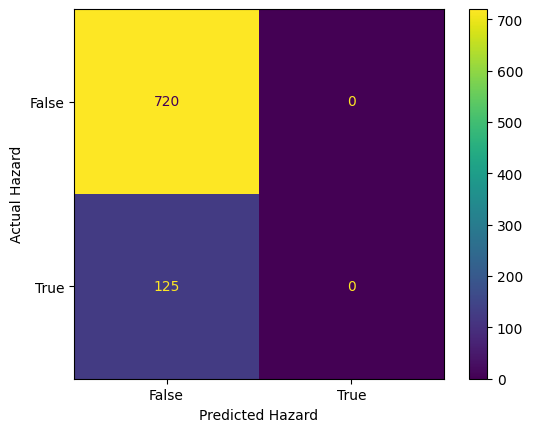

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       720
           1       0.00      0.00      0.00       125

    accuracy                           0.85       845
   macro avg       0.43      0.50      0.46       845
weighted avg       0.73      0.85      0.78       845



c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from utils import data_preprocessing, data_results


def train_naive_bayes():

    nb_class = GaussianNB()
    nb_class.fit(training_inputs, training_classes)

    nb_class.score(testing_inputs, testing_classes)

    accuracy_score(testing_classes, nb_class.predict(testing_inputs))

    data_results(testing_classes, testing_inputs, nb_class)

train_naive_bayes()

[[716   4]
 [  1 124]]


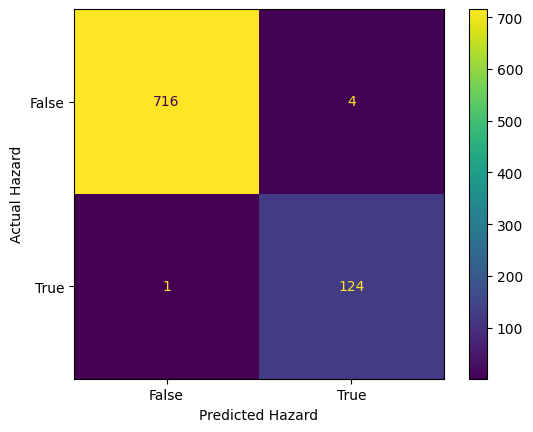

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       720
           1       0.97      0.99      0.98       125

    accuracy                           0.99       845
   macro avg       0.98      0.99      0.99       845
weighted avg       0.99      0.99      0.99       845



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


def train_rand_forest(n=100):
    rf_class = RandomForestClassifier(n_estimators=n)
    rf_class.fit(training_inputs, training_classes)

    rf_class.score(testing_inputs, testing_classes)

    accuracy_score(testing_classes, rf_class.predict(testing_inputs))

    data_results(testing_classes, testing_inputs, rf_class)

train_rand_forest()